In [16]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import random
import json
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

plt.style.use('seaborn-deep')
matplotlib.rc('font', size=10)
plt.rcParams["font.family"] = "Times New Roman"

In [25]:
import numpy
def smooth(x, window_len=100, window='flat'):
    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError

    s=numpy.r_[x[window_len//2:0:-1],x,x[-2:-window_len//2-1:-1]]
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

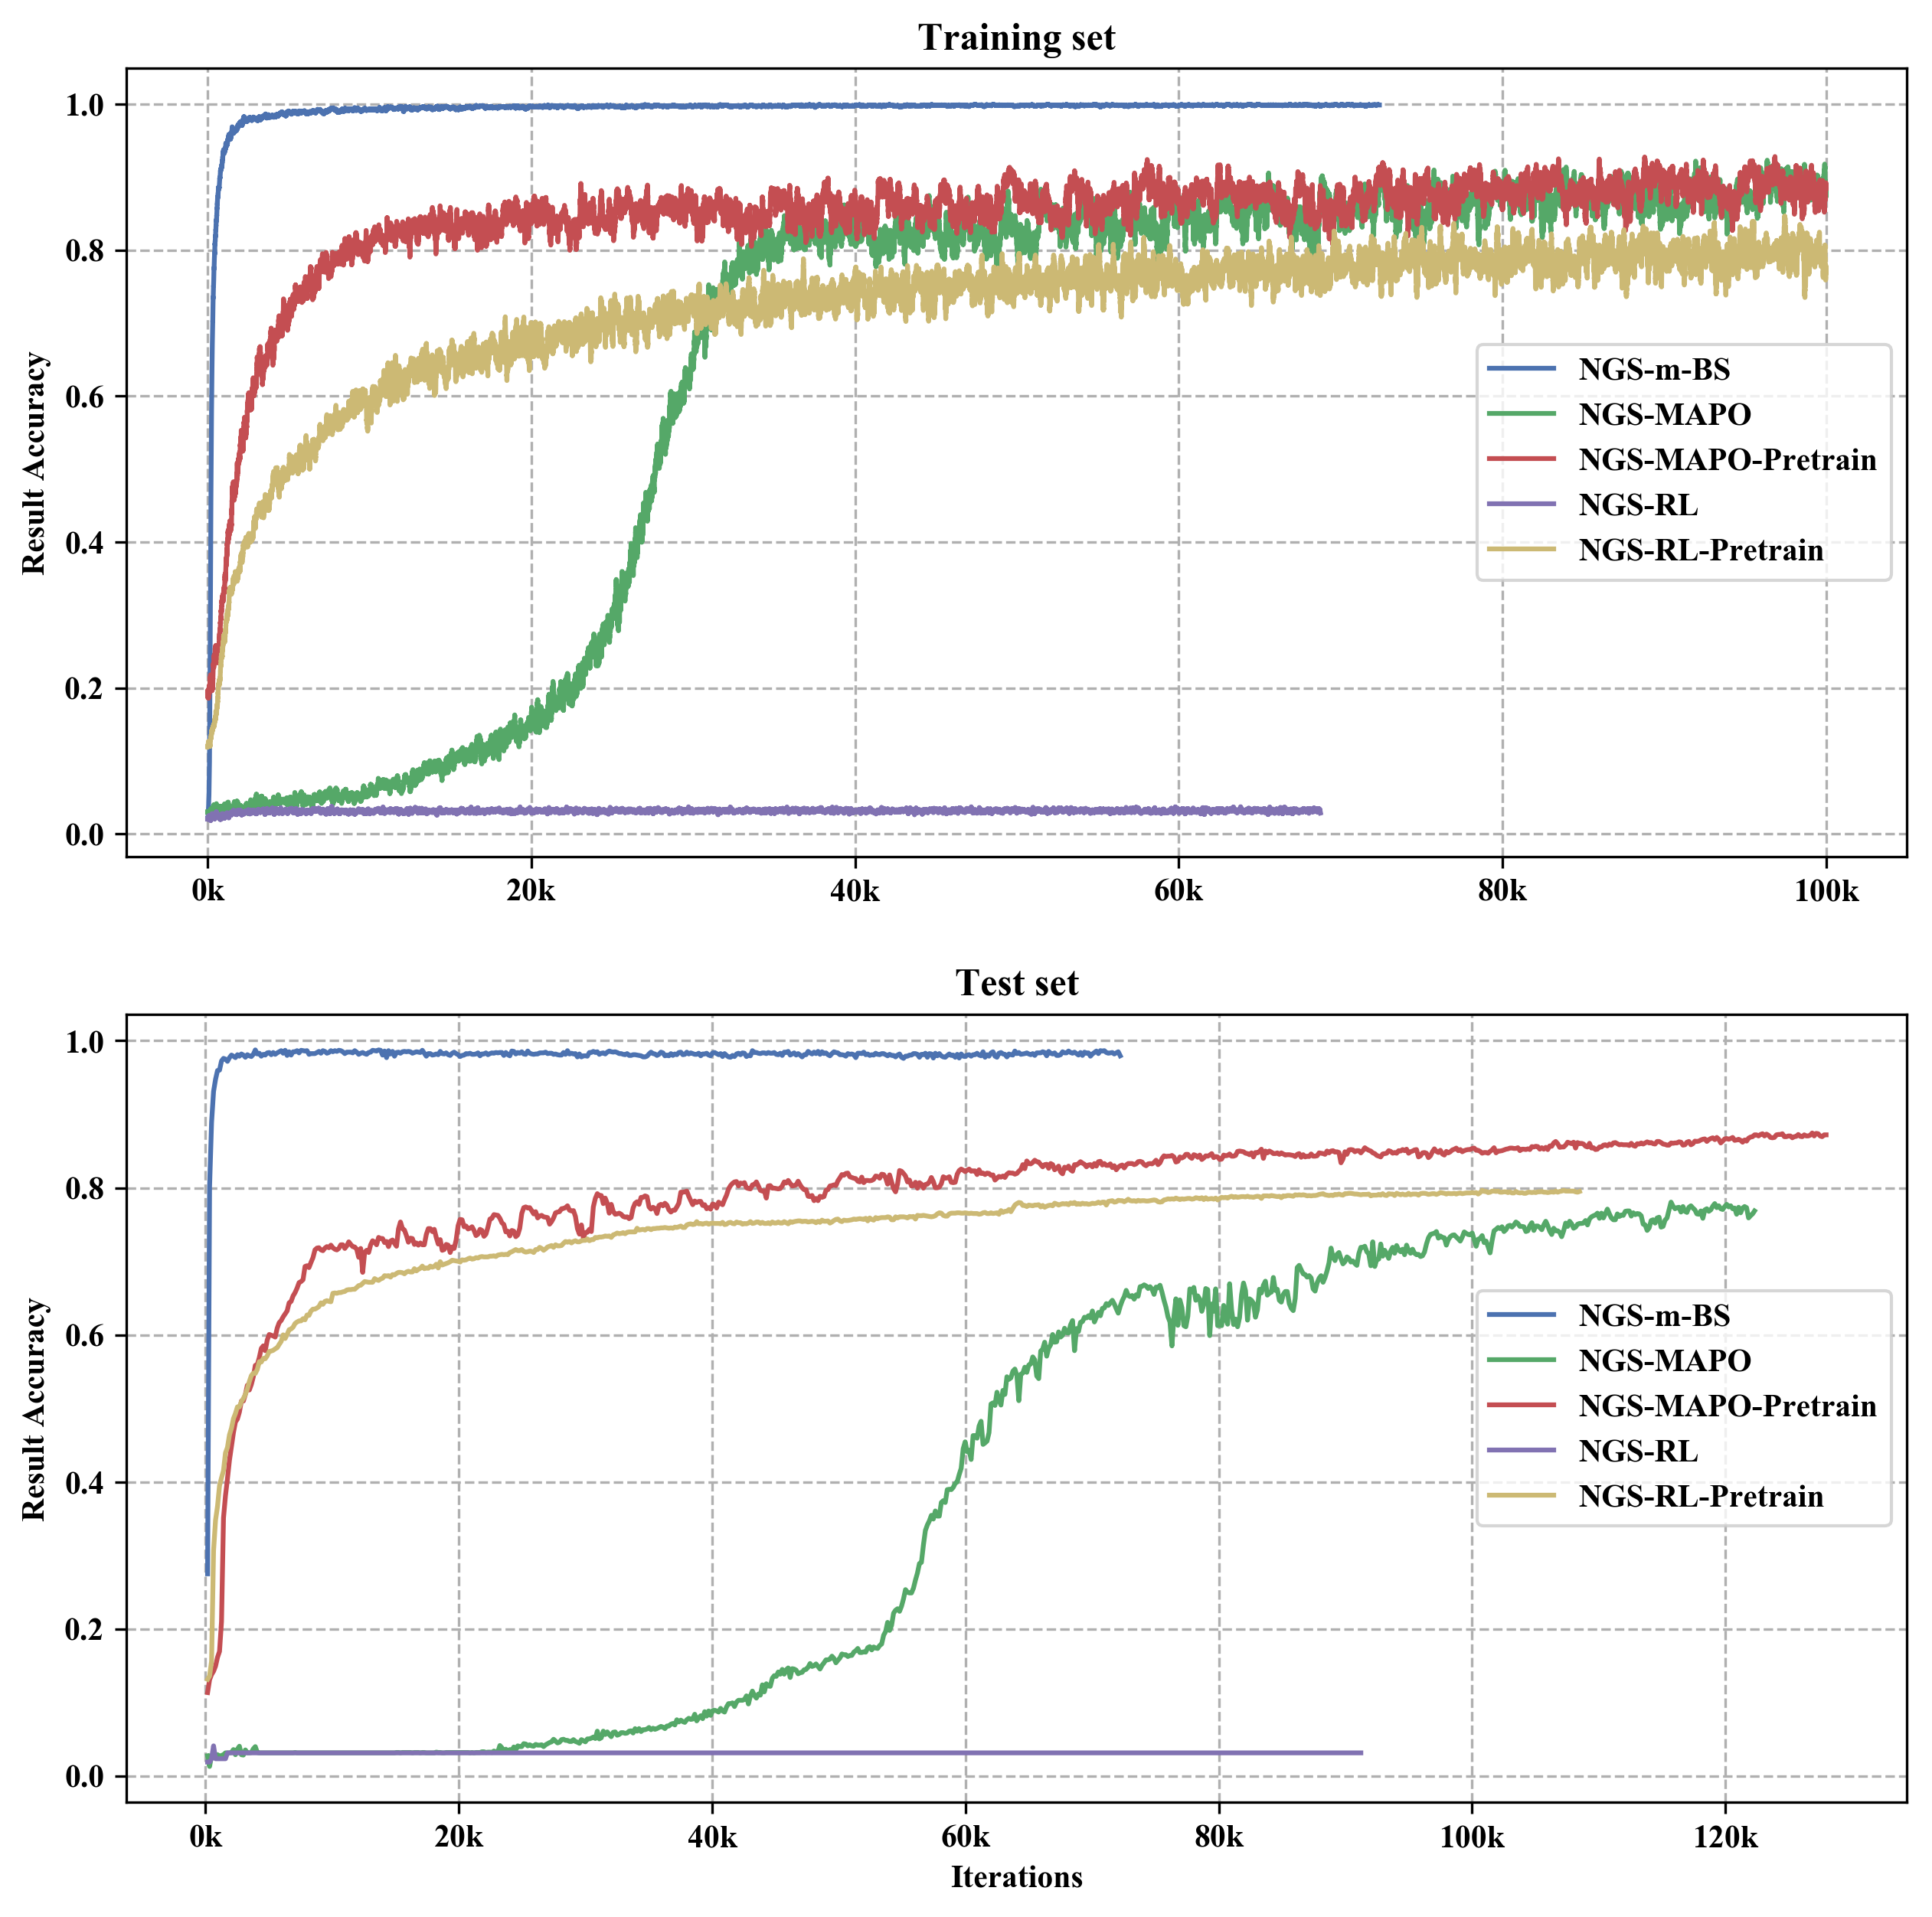

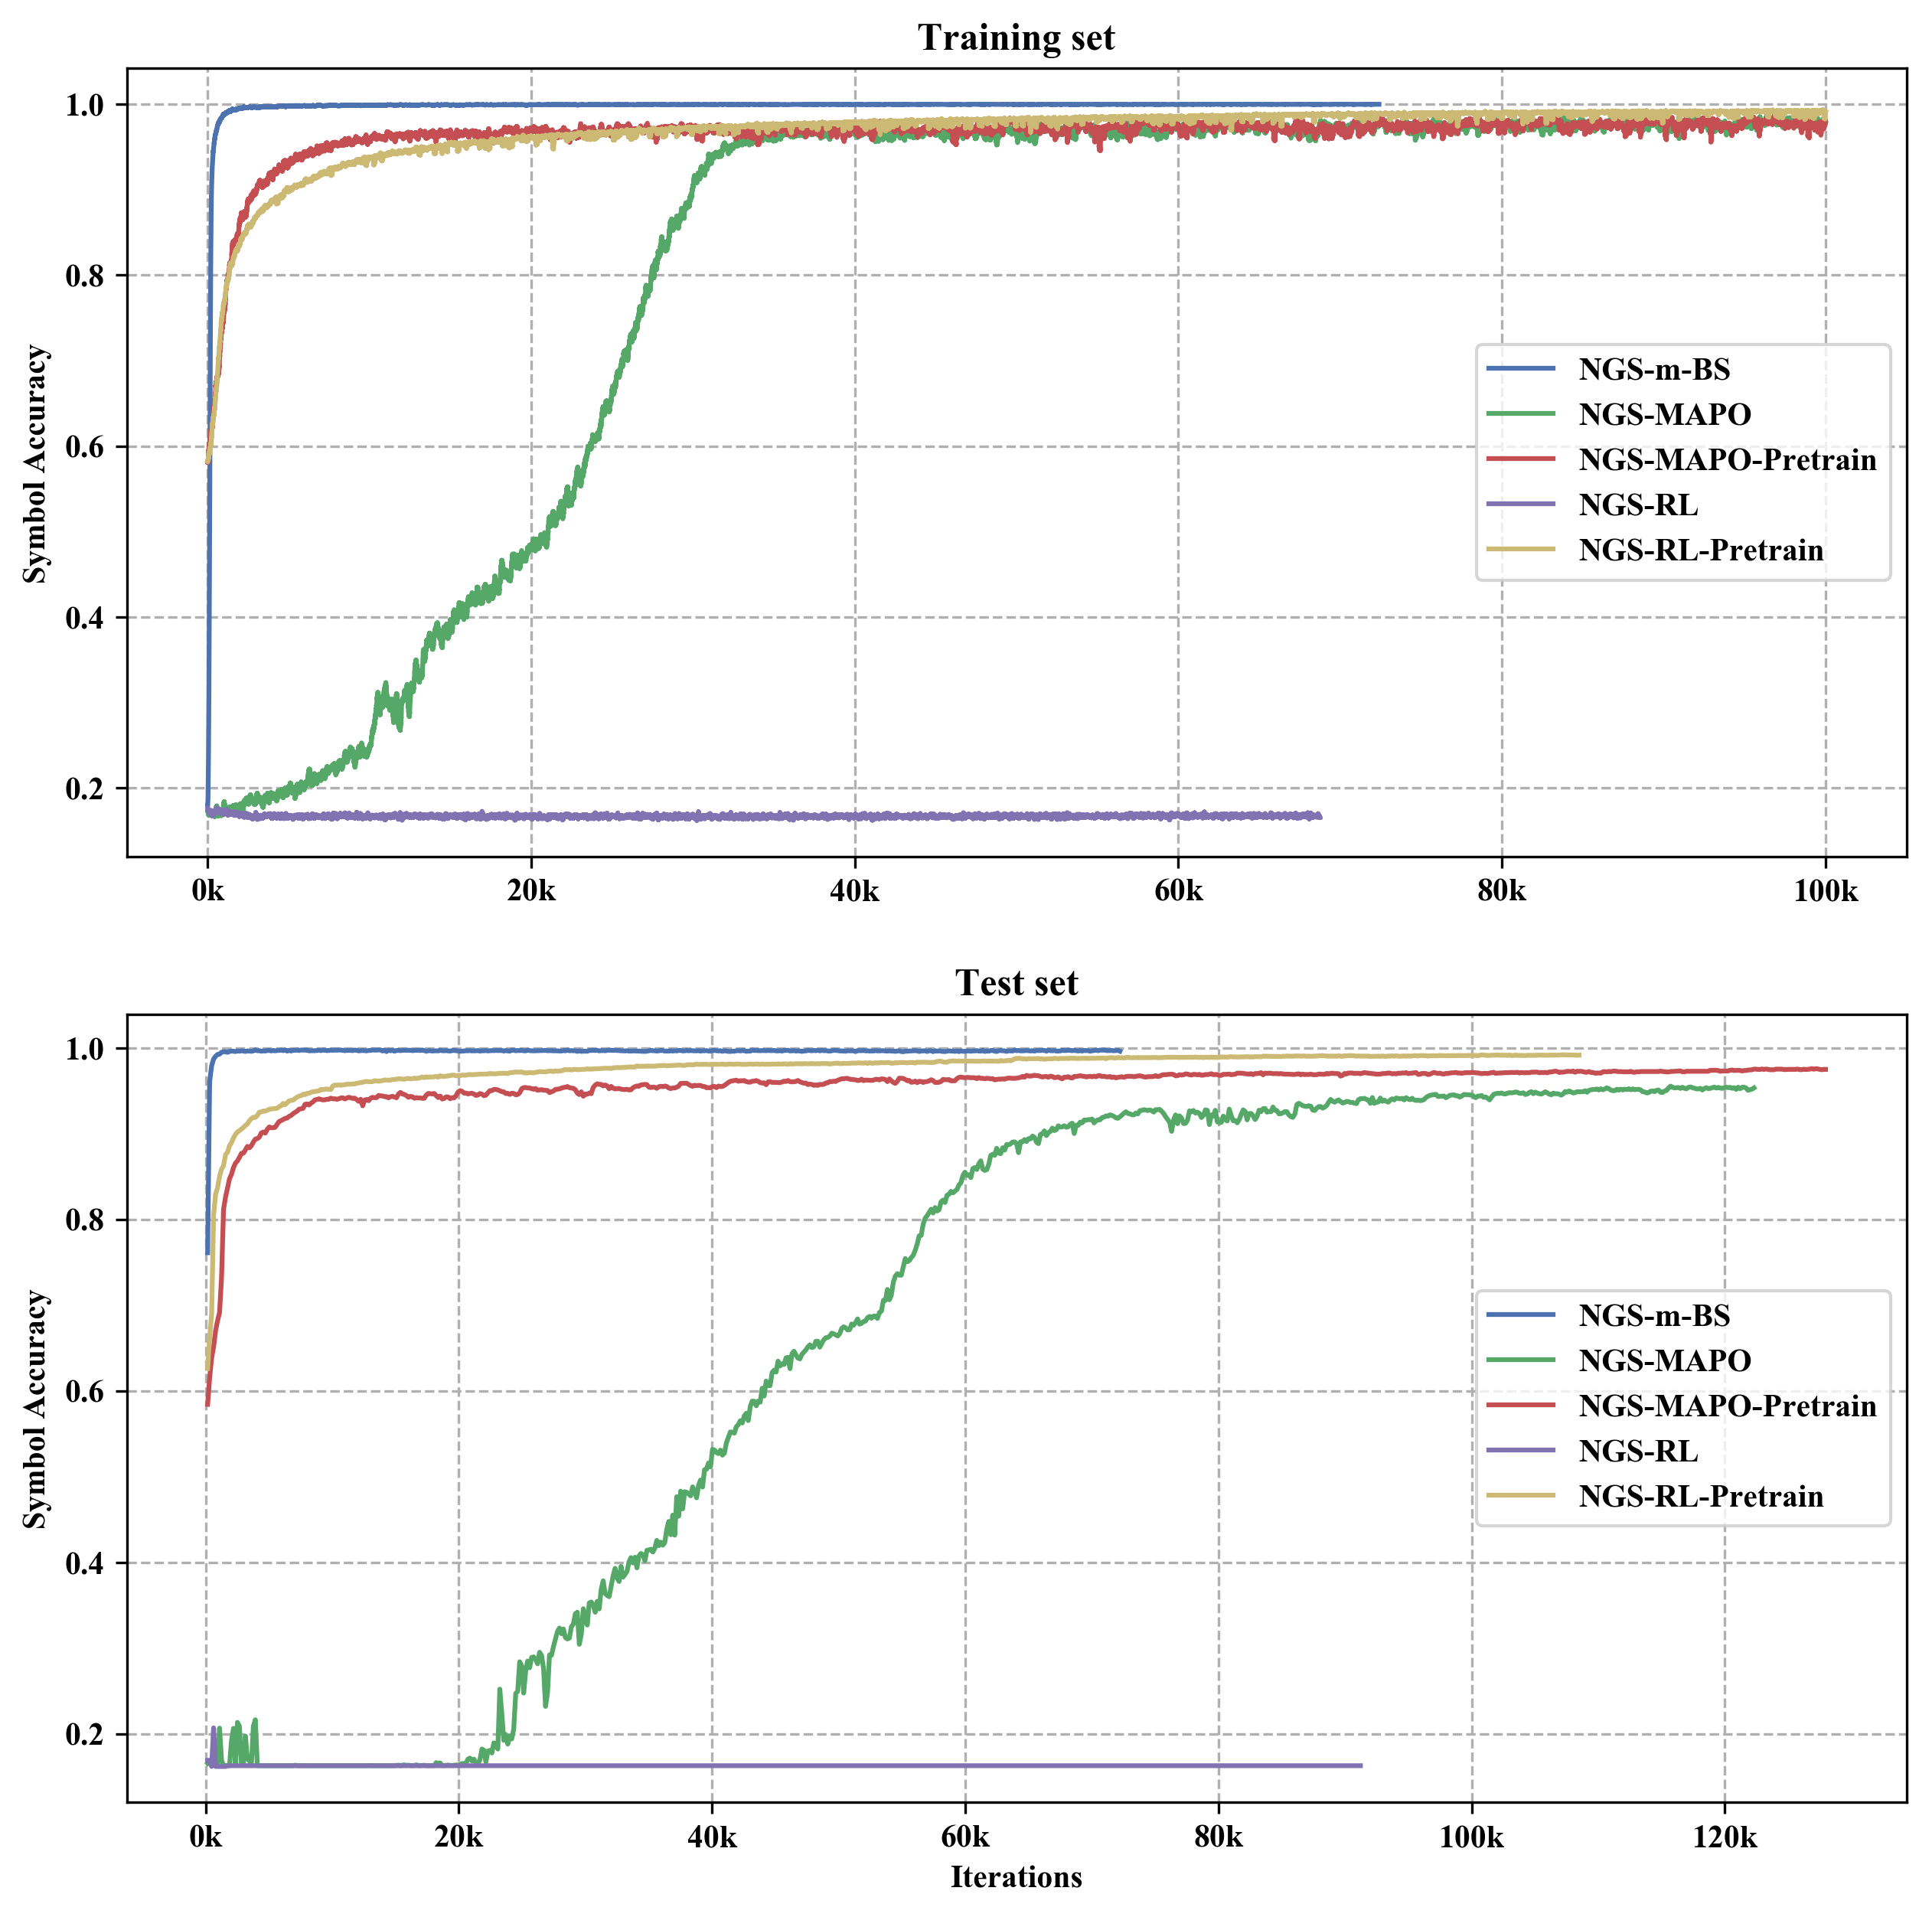

In [30]:
models = ["NGS-m-BS", "NGS-MAPO", "NGS-MAPO-Pretrain", "NGS-RL", "NGS-RL-Pretrain"]
meters = ["stats_BS_1.00_0.json", "stats_MAPO_1.00_0.json", "stats_MAPO_1.00_1.json", "stats_RL_1.00_0.json", "stats_RL_1.00_1.json"]
meters = [json.load(open('results/' + x)) for x in meters]
batch_size = 70
n_iters = 21e3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax = ax1
ax.grid(linestyle='--')
#ax.set_xlim(right=1.2e5)
for model, meter in zip(models, meters):
    it = [x[0] for x in meter['train_accs']]
    acc = [x[1] for x in meter['train_accs']]
    acc = smooth(acc)
    ax.plot(it, acc, '-', label=model)
ax.legend(loc='right')
ax.set_title('Training set')
ax.set_ylabel('Result Accuracy')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,pos: '%dk' % (x*1e-3)))

ax = ax2
ax.grid(linestyle='--')
#ax.set_xlim(right=1.2e5)
for model, meter in zip(models, meters):
    it = [x[0] for x in meter['val_accs']]
    acc = [x[1] for x in meter['val_accs']]
    ax.plot(it, acc, '-', label=model)
ax.legend(loc='right')
ax.set_title('Test set')
ax.set_xlabel('Iterations')
ax.set_ylabel('Result Accuracy')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,pos: '%dk' % (x*1e-3)))
plt.savefig('acc_plot.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax = ax1
ax.grid(linestyle='--')
#ax.set_xlim(right=1.2e5)
for model, meter in zip(models, meters):
    it = [x[0] for x in meter['train_accs']]
    acc = [x[2] for x in meter['train_accs']]
    acc = smooth(acc)
    ax.plot(it, acc, '-', label=model)
ax.legend(loc='right')
ax.set_title('Training set')
ax.set_ylabel('Symbol Accuracy')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,pos: '%dk' % (x*1e-3)))

ax = ax2
ax.grid(linestyle='--')
#ax.set_xlim(right=1.2e5)
for model, meter in zip(models, meters):
    it = [x[0] for x in meter['val_accs']]
    acc = [x[2] for x in meter['val_accs']]
    ax.plot(it, acc, '-', label=model)
ax.legend(loc='right')
ax.set_title('Test set')
ax.set_xlabel('Iterations')
ax.set_ylabel('Symbol Accuracy')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,pos: '%dk' % (x*1e-3)))
plt.savefig('acc_plot.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()
